In [1]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from functions.p4.PCA import *

biopsy = pd.read_csv('datasets/biopsy.csv', sep=";", index_col=0)
biopsy

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
ID,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,benign
1002945,5,4,4,5,7,10.0,3,2,1,benign
1015425,3,1,1,1,2,2.0,3,1,1,benign
1016277,6,8,8,1,3,4.0,3,7,1,benign
1017023,4,1,1,3,2,1.0,3,1,1,benign
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2.0,1,1,1,benign
841769,2,1,1,1,2,1.0,1,1,1,benign
888820,5,10,10,3,7,3.0,8,10,2,malignant


# PCA
Principle-componenten analyse

Doel: een grote hoeveelheid data beschrijven aan de hand van een kleiner aantal relevante grootheden.

## Karakteristieken
De PCA helpt om een grote hoeveelheid variabelen te herleiden tot hun hoofdcomponenten die zo goed als alle data kunnen verklaren.

Er moeten meerdere veronderstellingen gemaakt worden over de data
- De gegevens bestaan uit observaties op minstens 2 verschillende variabelen (het is wel pas echt zinvol vanaf 3+ variabelen)
- De corraltie tussen de verschillende variabelen mogen niet te laag zijn
- De gegevens moeten op de ratio schaal zijn

Wanneer de oorspronkelijke data wordt herleid naar de hoofdcomponenten moet de data voldoen aan deze voorwaarden

### Berekenings principe

Stel dat de data uit $n$ observaties bestaan met $m$ variabelen: $X_1,X_2,...,X_m$

* $PC_1 = a_{11}X_1 + a_{12}X_2 + ... + a_{1m}X_m$
Waarbij de variantie van $PC_1$ zo groot mogelijk is onder de voorwaarde dat, $a^2_{11} + a^2_{12} + ... + a^2_{1m} = 1$
* $PC_2 = a_{21}X_1 + a_{22}X_2 + ... + a_{2m}X_m$
Waarbij de variante van $PC_1$ zo groot mogelijk is onder de voorwaarde dat, $a^2_{21} + a^2_{22} + ... + a^2_{2m} = 1$
En de correlatie tussen $PC_1$ en $PC_2$ nul is.

enz. tot en met $PC_m$
Er worden evenveel hoofdcomponenten opgesteld als er variabelen zijn

Men gaat op zoek naar de eigenwaarden λ$_i$ en de eigenvector $v_i$ van de covariantie matrix:
* De variantie van $PC_i$ komt overeen met de $i^e$ eigenwaarde van λ$_i$
* De gezochte coëfficiënten $a_{i1},a_{i2},...,a_{im}$ komen overeen met de $i^e$ eigenvector

Merk op dat λ$_i$ > λ$_{i+1}$ voor $i = 1,...,m-1$

De X$_i$ waarde wordt eerst omgezet naar zijn Z-score

### Resultaten van een PCA
De hoofdcomponenten
* Komen niet overeen met bepaalde variabelen
* zijn in feite een combinatie van de variabelen
* worden geordend weergeven: van de hoofdcomponent met het grootste gedeelte van de verklaring in de variatie van de gegevens tot de hoofdcomponent met het kleinste gedeelte van de verklaring in de variatie van de gegevens

De gegeven variabelen zijn vervangen door een beperkt aantal getransformeerde variabelen

## PCA in Python
<font color='red'>Belangrijk</font>
Vergeet niet van `pip install pca`

### Create PCA

In [2]:
#Volgende functie kan worden gebruikt om een PCA model aan te maken
model = createPCA(biopsy, 5, ['class'])
#X is de aangepaste data
#5 is het aantal gewenste hoofdcomponenten

De functie kan ook gebruikt worden om de coefficiënten van de PCA terug te krijgen

In [3]:
createPCA(biopsy, 5, ['class'], 'loadings')

,V1,V2,V3,V4,V5,V6,V7,V8,V9
PC1,0.302063,0.380793,0.377583,0.332724,0.336234,0.335068,0.345747,0.335591,0.230206
PC2,-0.140801,-0.046640,-0.082422,-0.052094,0.164404,-0.261261,-0.228077,0.033966,0.905557
PC3,-0.866372,0.019938,-0.033511,0.412647,0.087743,-0.000691,0.213072,0.134248,-0.080492
PC4,-0.107828,0.204255,0.175866,-0.493173,0.427384,-0.498618,-0.013047,0.417113,-0.258988
PC5,-0.080321,0.145653,0.108392,0.019569,0.636693,0.124773,-0.227666,-0.690210,-0.105042


Of om de verklaarde variantie te zien

In [4]:
createPCA(biopsy, 5,['class'], 'var')

,PC1,PC2,PC3,PC4,PC5
variance_ratio,0.6555,0.086216,0.059917,0.051070,0.042253
explained_var,0.6555,0.741716,0.801633,0.852703,0.894956


Of voor de topfeat te bekijken van de PCA (De belangrijkste attributen in elke componenten)

In [5]:
createPCA(biopsy, 5,['class'], 'topfeat')

,PC,feature,loading,type
0,PC1,V2,0.380793,best
1,PC2,V9,0.905557,best
2,PC3,V1,-0.866372,best
3,PC4,V6,-0.498618,best
4,PC5,V8,-0.690210,best
5,PC1,V3,0.377583,weak
6,PC4,V4,-0.493173,weak
7,PC5,V5,0.636693,weak
8,PC1,V7,0.345747,weak


Of om de PCA te plotten

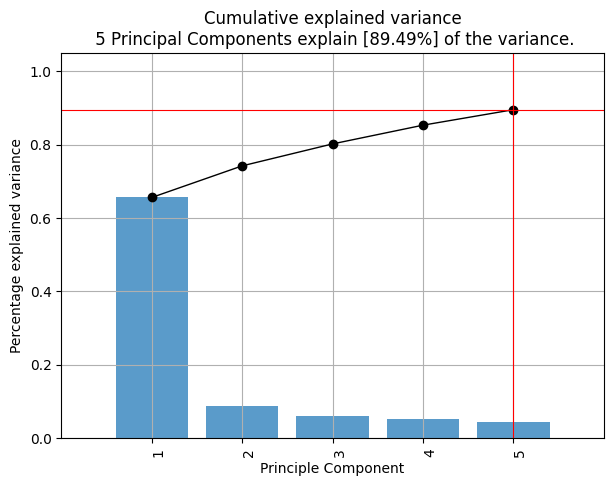

<Figure size 640x480 with 0 Axes>

In [6]:
createPCA(biopsy, 5,['class'], 'plot')

Om een Biplot te krijgen van de PCA

[pca] >Plot PC1 vs PC2 with loadings.


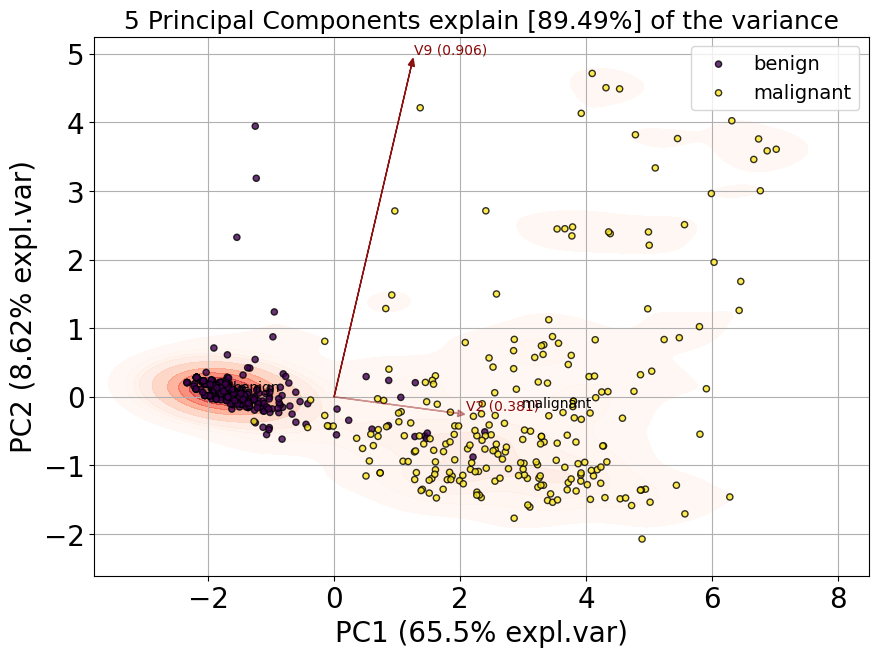

In [7]:
createPCA(biopsy, 5,['class'], 'biplot')

Of een 3D projectie van de PCA

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


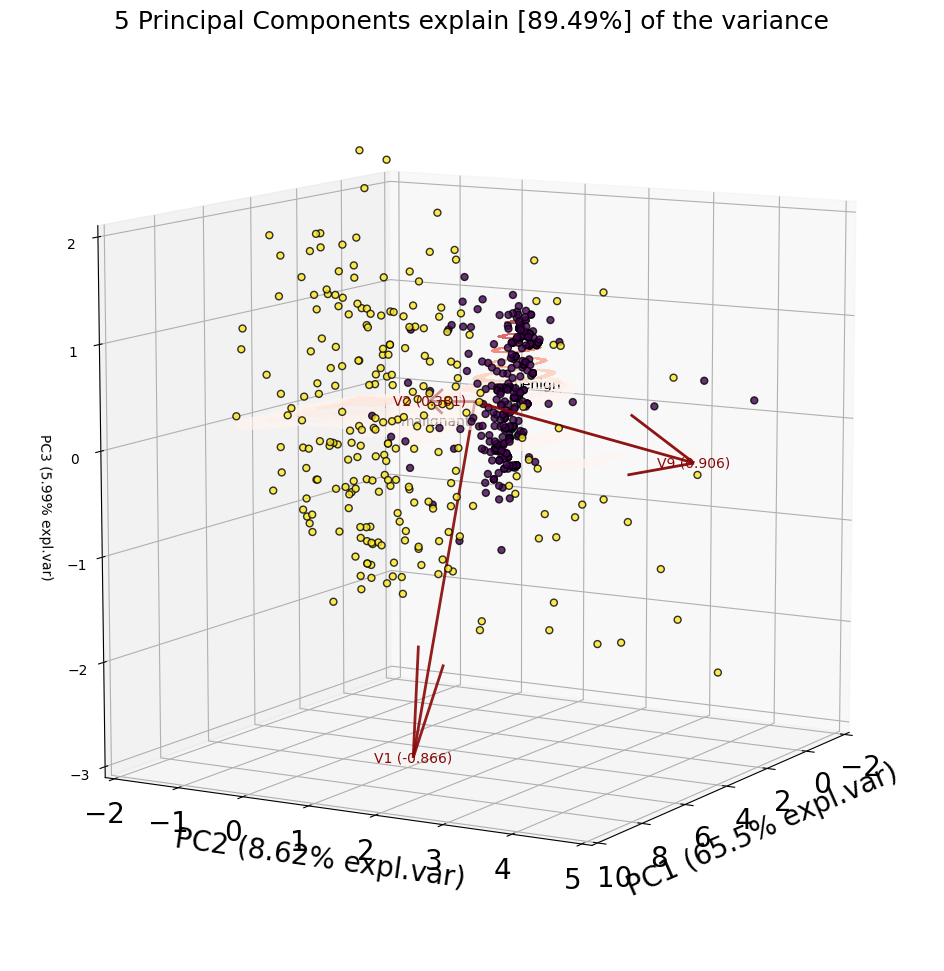

In [8]:
createPCA(biopsy, 5, ['class'], output='project')

volgende functie kan worden gebruikt om het model te transformen

In [9]:
createPCA(biopsy, 5, ['class'], output='loadings', transform=True)

[pca] >Extracting column labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


C:\Users\zouff\Desktop\school\data science\functions\p4\PCA.py:17: UserWarning: The output option will be ignored when the transform option is True
  warnings.warn('The output option will be ignored when the transform option is True')


,PC1,PC2,PC3,PC4,PC5
mapped,-1.470171,-0.104273,-0.565685,-0.031959,-0.150998
mapped,1.442046,-0.570141,0.236601,-0.478150,1.643085
mapped,-1.592478,-0.076120,0.048858,-0.092388,-0.059739
mapped,1.479812,-0.528452,-0.603048,1.410827,-0.560737
mapped,-1.344862,-0.090719,0.029997,-0.338284,-0.108829
...,...,...,...,...,...
mapped,-1.723605,0.184232,-0.085730,0.110661,0.412880
mapped,-2.074148,0.231929,0.182329,0.093465,0.120498
mapped,3.789261,-0.142209,0.662144,2.496133,-0.443185
mapped,2.240007,-1.091287,1.031890,0.678641,-0.980591
